In [154]:
import numpy as np
import pandas as pd

In [155]:
ds=pd.read_csv("moviereviews.csv")
ds.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [156]:
ds.isnull().sum()

label      0
review    35
dtype: int64

In [157]:
ds.shape

(2000, 2)

In [158]:
ds.dropna(inplace=True)

In [159]:
ds["label"].value_counts()

label
neg    983
pos    982
Name: count, dtype: int64

In [160]:
ds["review"].str.isspace().sum()

27

In [161]:
ds=ds[~ds["review"].str.isspace()]

In [162]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


#### EDA on Bag of Words

In [164]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words="english")

In [165]:
smat_neg=cv.fit_transform(ds[ds["label"]=="neg"]["review"])
freq_n=zip(cv.get_feature_names_out(),smat_neg.sum(axis=0).tolist()[0])
print("Top 20 words used for Negative reviews:")
print(sorted(freq_n,key=lambda x:-x[1])[:20])

Top 20 words used for Negative reviews:
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [166]:
smat_pos=cv.fit_transform(ds[ds["label"]=="pos"]["review"])
freq_p=zip(cv.get_feature_names_out(),smat_pos.sum(axis=0).tolist()[0])
print("Top 20 words used for Positive reviews:")
print(sorted(freq_p,key=lambda x:-x[1])[:20])

Top 20 words used for Positive reviews:
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


#### Features and Label

In [168]:
data=ds[["label","review"]]
x=ds["review"]
y=ds["label"]

#### Train Test Split

In [170]:
from sklearn.model_selection import train_test_split
data.shape

(1938, 2)

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

#### Vectorization

In [259]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words="english")
tfidf.fit(x_train)

TfidfVectorizer(stop_words='english')

In [174]:
x_train_tfidf=tfidf.transform(x_train)
x_test_tfidf=tfidf.transform(x_test)

#### Model Comparison

In [176]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train_tfidf,y_train)

MultinomialNB()

In [177]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=1000)
log.fit(x_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [178]:
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc.fit(x_train_tfidf,y_train)

LinearSVC()

In [179]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train_tfidf,y_train)

RandomForestClassifier()

#### Performance Evaluation

In [181]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [182]:
def report(model):
    print("Model is:",model)
    y_pred=model.predict(x_test_tfidf)
    print(classification_report(y_pred,y_test))
    cm=confusion_matrix(y_pred,y_test)
    display=ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()

Model is: MultinomialNB()
              precision    recall  f1-score   support

         neg       0.87      0.78      0.82       214
         pos       0.76      0.86      0.80       174

    accuracy                           0.81       388
   macro avg       0.81      0.82      0.81       388
weighted avg       0.82      0.81      0.81       388



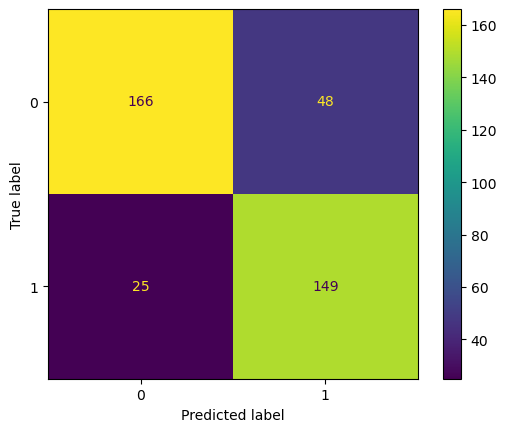

In [183]:
report(nb)

Model is: LogisticRegression(max_iter=1000)
              precision    recall  f1-score   support

         neg       0.85      0.80      0.83       204
         pos       0.79      0.85      0.82       184

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



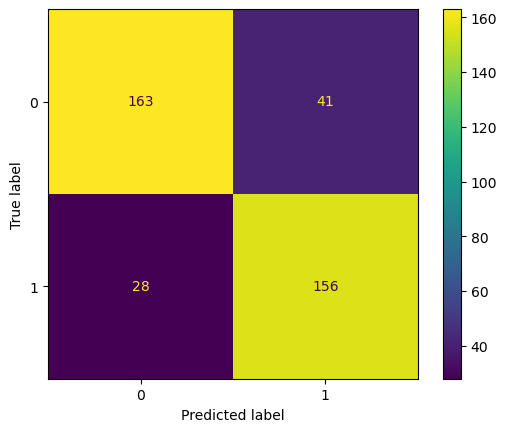

In [184]:
report(log)

Model is: LinearSVC()
              precision    recall  f1-score   support

         neg       0.84      0.81      0.82       197
         pos       0.81      0.84      0.82       191

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



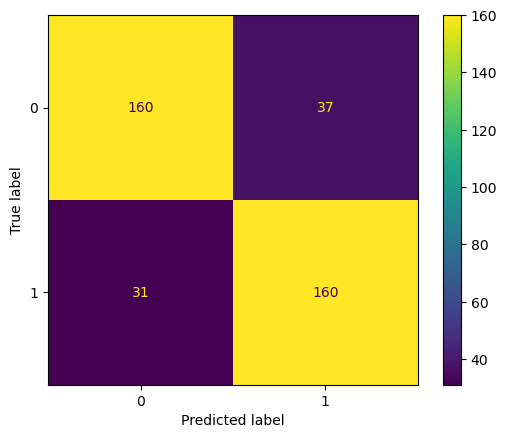

In [185]:
report(svc)

Model is: RandomForestClassifier()
              precision    recall  f1-score   support

         neg       0.86      0.72      0.79       228
         pos       0.68      0.84      0.75       160

    accuracy                           0.77       388
   macro avg       0.77      0.78      0.77       388
weighted avg       0.79      0.77      0.77       388



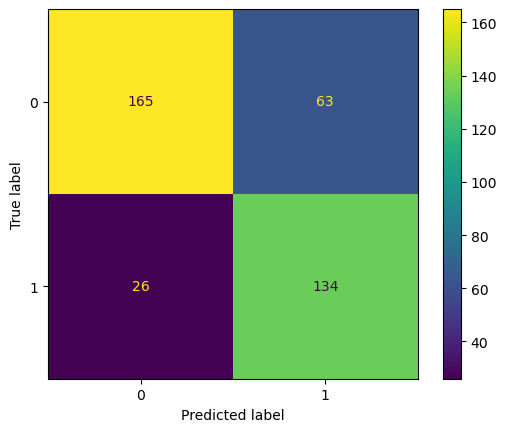

In [186]:
report(rfc)

#### Pipeline

In [261]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([("tfidf",TfidfVectorizer(stop_words="english")),("svc",LinearSVC())])
pipe.fit(ds["review"],ds["label"])

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svc', LinearSVC())])

In [263]:
new_review=["This movie is a masterpiece","The actor could have done more","the scenes were beautiful and the meaning was deep"]
pipe.predict(new_review)

array(['pos', 'pos', 'pos'], dtype=object)

In [265]:
review1=["This movie is good but could have been better","this movie is good","the movie was bad"]
pipe.predict(review1)

array(['neg', 'pos', 'neg'], dtype=object)

In [269]:
pipe.predict(["This movie is bad"])

array(['neg'], dtype=object)